# NGC LDSC Regression
**Author**: Jesse Marks <br>
**GitHub Issue:** [#140](https://github.com/RTIInternational/bioinformatics/issues/140) <br>
**Results Location:** `s3://rti-heroin/ldsc/ngc_20191211`

Compare FOU, OAall, OAall_no_deCODE, and OAexp to the following:
* **Each other**
* **FTND**
* **Cigarettes per day (GSCAN)**
* **Smoking cessation (current vs. former, GSCAN)**
* **Smoking initiation (ever vs. never, GSCAN)**
* **Age of smoking initiation (GSCAN)**
* **Alcohol dependence**
* **Alcohol drinks per week (GSCAN)**
* *MVP alcohol*
* AUDIT
* **Cannabis use disorder**
* **Lifetime cannabis use (ever vs. never)**
* Parkinson's disease
* Amyotrophic lateral sclerosis
* Alzheimers disease
* Intelligence
* Childhood IQ
* College completion
* Years of schooling
* Neuroticism
* Conscientiousness
* Openness to experience
* **Posttraumatic Stress Disorder**
* Attention deficit hyperactivity disorder
* Depressive symptoms
* Major depressive disorder
* Bipolar disorder
* Psychiatric cross-disorder
* Schizophrenia
* Autism spectrum disorder
* Anorexia Nervosa
* Subjective well being
* Putamen volume
* Accumbens volume
* Pallidum volume
* Caudate volume
* Thalamus volume
* Hippocampus volume
* Intracranial volume

\* bold are in-house; and italics we will acquire soon.

**Note** that most of the in-house data are located on S3 at: `s3://rti-nd/LDSC`

**Note**: AUDIT comes with 3 sets of results: AUDIT_T, AUDIT_C, and AUDIT_P. AUDIT_C is the results of a GWAS on items 1-3 which was focused on consumption, AUDIT_P is the results of a GWAS on items 4-10 which was focused on problematic consequences, and AUDIT_T is the results of a GWAS on all the items. We will add all three sets of results in the LDSC regression.

We are going to utilize the [LD score regression pipeline](https://github.com/RTIInternational/ld-regression-pipeline) that Alex Waldrop developed to perform LD score regression. 

## Data
NGC summary stats results location:
* **FOU**: `s3://rti-midas-data/studies/ngc/meta/087/processing/fou/alive+cats+cogend+start+uhs1-4+vidus+yale-penn.ea.fou.chr[1-22].maf_gt_0.01.rsq_gt_0.3.gz`<br><br>
* **OAall**: `s3://rti-midas-data/studies/ngc/meta/089/processing/oaall/cats+coga+decode+kreek+odb+uhs+vidus+yale-penn.ea.chr[1-22].maf_gt_0.01.rsq_gt_0.3.gz`<br><br>
* **OAexp**: `s3://rti-midas-data/studies/ngc/meta/060/processing/oaexp/coga+decode+yale_penn.ea.chr[1-22].maf_gt_0.01.rsq_gt_0.3.gz`

<br>

**sample sizes**
* OAall: 304507
* OAall with deCODE subset of OAexp: 31,620
* OAall_no_deCODE: 29039
* OAexp: 5561
* FOU: 5388

### Data wrangling
Format the summary stats for input into cromwell.

In [ ]:
## FOU
cd /shared/jmarks/heroin/ldsc/ngc_all/fou/001/processing
for chr in {1..22};do 
    aws s3 cp s3://rti-midas-data/studies/ngc/meta/087/processing/fou/alive+cats+cogend+start+uhs1-4+vidus+yale-penn.ea.fou.chr$chr.maf_gt_0.01.rsq_gt_0.3.gz . --quiet &
done

outf=fou_087.txt
for chr in {1..22};do
    inf=alive+cats+cogend+start+uhs1-4+vidus+yale-penn.ea.fou.chr$chr.maf_gt_0.01.rsq_gt_0.3.gz
    awk '{print $1,$2,$3,$4,$5,$6,$8}' <(zcat $inf) >> $outf
done &

gzip $outf
## upload to S3
aws s3 cp $outf.gz s3://rti-nd/LDSC/opioid_fou/$outf.gz
    
    
## FOU (002)
cd /shared/jmarks/heroin/ldsc/ngc_all/fou/002/processing
for chr in {1..22};do 
    aws s3 cp s3://rti-midas-data/studies/ngc/meta/092/processing/fou/alive+cats+cogend+start+uhs1-3+vidus+yale-penn.ea.fou.chr$chr.maf_gt_0.01.rsq_gt_0.3.gz . --quiet &
done

outf=fou_092.txt
for chr in {1..22};do
    inf=alive+cats+cogend+start+uhs1-3+vidus+yale-penn.ea.fou.chr$chr.maf_gt_0.01.rsq_gt_0.3.gz
    awk '{print $1,$2,$3,$4,$5,$6,$8}' <(zcat $inf) >> $outf
done &

gzip $outf
## upload to S3
aws s3 cp $outf.gz s3://rti-nd/LDSC/opioid_fou/$outf.gz

## OAexp
for chr in {1..22}; do
    aws s3 cp s3://rti-midas-data/studies/ngc/meta/060/processing/oaexp/coga+decode+yale_penn.ea.chr$chr.maf_gt_0.01.rsq_gt_0.3.gz . --quiet &
done

outf=oaexp_060.txt
for chr in {1..22};do
    inf=coga+decode+yale_penn.ea.chr$chr.maf_gt_0.01.rsq_gt_0.3.gz
    awk '{print $1,$2,$3,$4,$5,$6,$8}' <(zcat $inf) >> $outf
done &

gzip $outf
## upload to S3
aws s3 cp $outf.gz s3://rti-nd/LDSC/opioid_oaexp/$outf.gz


## OAall
for chr in {1..22}; do
    aws s3 cp s3://rti-midas-data/studies/ngc/meta/089/processing/oaall/cats+coga+decode+kreek+odb+uhs+vidus+yale-penn.ea.chr$chr.maf_gt_0.01.rsq_gt_0.3.gz . --quiet &
done

outf=oaall_089.txt
for chr in {1..22};do
    inf=cats+coga+decode+kreek+odb+uhs+vidus+yale-penn.ea.chr$chr.maf_gt_0.01.rsq_gt_0.3.gz
    awk '{print $1,$2,$3,$4,$5,$6,$8}' <(zcat $inf) >> $outf
done &

gzip $outf
## upload to S3
aws s3 cp $outf.gz s3://rti-nd/LDSC/opioid_oaall/$outf.gz


## OAall (no deCODE)
for chr in {1..22}; do
    aws s3 cp  s3://rti-midas-data/studies/ngc/meta/091/processing/oaall/cats+coga+kreek+odb+uhs+vidus+yale-penn.ea.chr$chr.maf_gt_0.01.rsq_gt_0.3.gz . --quiet &
done

outf=oaall_091.txt
for chr in {1..22};do
    inf=cats+coga+kreek+odb+uhs+vidus+yale-penn.ea.chr$chr.maf_gt_0.01.rsq_gt_0.3.gz
    awk '{print $1,$2,$3,$4,$5,$6,$8}' <(zcat $inf) >> $outf
done &

gzip $outf
## upload to S3
aws s3 cp $outf.gz s3://rti-nd/LDSC/opioid_oaall/$outf.gz

    
## AUDIT
cd /shared/jmarks/heroin/ldsc/audit
aws s3 cp s3://rti-nd/LDSC/audit_ukb/AUDIT_UKB_2018_AJP.txt.gz . --quiet &
gunzip *
   
# keep only SNPs with rsid      
awk ' {a=substr($2,1,2)} {if (a=="rs") {print $0}}' AUDIT_UKB_2018_AJP.txt  > audit_rsid.txt &

# order the SNPs
head -1 AUDIT_UKB_2018_AJP.txt > audit_rsid_ordered.txt
for chr in {1..22}; do
    awk -v chr=$chr '$1==chr' audit_rsid.txt >> audit_rsid_ordered.txt 
done &


## add position information
###############################################################################################################################################################                
### python3 ###
infile = "audit_rsid_ordered.txt"

with open(infile) as inF:
    head = inF.readline()
    new_head = "pos\t{}".format(head)
    line = inF.readline()
    print(head)

    audict = dict()
    while line:
        sl = line.split()
        chr_rs = "{}:{}".format(sl[0], sl[1])
        audict[chr_rs] = sl
        line = inF.readline()

    # for each  chromosome
    for chrom in range(1,23):
        plinkfile = "/shared/data/ref_panels/1000G/2013.05/plink/ALL.chr{}.bim".format(chrom)
        outfile = "audit_rsid_ordered_positions_chr{}.txt".format(chrom)

        with open(plinkfile) as pF, open(outfile, "w") as outF:
            outF.write(new_head)
            line = pF.readline()
            while line:
                sl = line.split()
                rsid = sl[1]
                pos = sl[3]
                chrom_id = "{}:{}".format(chrom, rsid)

                if chrom_id in audict:
                    newline = "{}\t{}\n".format(pos, "\t".join(audict[chrom_id]))
                    outF.write(newline)
                line = pF.readline()
###############################################################################################################################################################                

outf=audit_t.txt
awk '{print $3,$2,$1,$4,$5,$7,$9, $16}' audit_rsid_ordered_positions_chr1.txt > $outf 
for chr in {2..22}; do
    inf=audit_rsid_ordered_positions_chr$chr.txt
    awk '{print $3,$2,$1,$4,$5,$7,$9, $16}' <(tail -n +2 $inf) >> $outf 
done &
    
outf=audit_c.txt
awk '{print $3,$2,$1,$4,$5,$10,$12, $16}' audit_rsid_ordered_positions_chr1.txt > $outf 
for chr in {2..22};do
    inf=audit_rsid_ordered_positions_chr$chr.txt
    awk '{print $3,$2,$1,$4,$5,$10,$12, $16}' <(tail -n +2 $inf) >> $outf
done &

outf=audit_p.txt
awk '{print $3,$2,$1,$4,$5,$13,$15, $16}' audit_rsid_ordered_positions_chr1.txt > $outf 
for chr in {2..22};do
    inf=audit_rsid_ordered_positions_chr$chr.txt
    awk '{print $3,$2,$1,$4,$5,$13,$15, $16}' <(tail -n +2 $inf) >> $outf
done &

gzip audit_{t,c,p}.txt 
# rename files
mv audit_t.txt.gz audit_t_ldsc_cromwell_ready.txt.gz
mv audit_c.txt.gz audit_c_ldsc_cromwell_ready.txt.gz
mv audit_p.txt.gz audit_p_ldsc_cromwell_ready.txt.gz

## upload to S3
for file in audit_{t,c,p}_ldsc_cromwell_ready.txt.gz; do
    aws s3 cp $file s3://rti-nd/LDSC/audit/$file
done

# Create WorkFlow inputs
Here is an example entry in the Excel Phenotype File:

**trait	plot_label	sumstats_path	pmid	category	sample_size	id_col	chr_col	pos_col	effect_allele_col	ref_allele_col	effect_col	pvalue_col	sample_size_col	effect_type	w_ld_chr**
```
COPDGWAS Hobbs et al.	COPD	s3://rti-nd/LDSC/COPDGWAS_HobbsEtAl/modGcNoOtherMinMissSorted.withchrpos.txt.gz	28166215	Respiratory	51772	3	1	2	4	5	10	12		beta	s3://clustername--files/eur_w_ld_chr.tar.bz2
```


In [ ]:
## 1. upload Excel phenotype file to EC2 instance
## 2. then edit full_ld_regression_wf_template.json to include the reference data of choice
## 3. lastly use dockerized tool to finish filling out the json file that will be input for workflow

## login to a larger compute node
screen
qrsh

#phenD=20191209_heroin_ldsc_phenotypes_local.xlsx
#procD=/shared/jmarks/heroin/ldsc/ngc_all/fou/001
git clone https://github.com/RTIInternational/ld-regression-pipeline/ $procD/ld-regression-pipeline
#mkdir $procD/ld-regression-pipeline/workflow_inputs
#mkdir -p $procD/{ldhub,plot} # for later processing

## upload files to */workflow_inputs/ ##

# create final workflow input (a json file) 
# edit this file
cp $procD/ld-regression-pipeline/json_input/full_ld_regression_wf_template.json \
    $procD/ld-regression-pipeline/workflow_inputs

docker run -v $procD/ld-regression-pipeline/workflow_inputs/:/data/ \
    rticode/generate_ld_regression_input_json:1ddbd682cb1e44dab6d11ee571add34bd1d06e21 \
    --json-input /data/full_ld_regression_wf_template.json \
    --pheno-file /data/$phenD >\
        $procD/ld-regression-pipeline/workflow_inputs/final_wf_inputs.json

## Run Analysis Workflow

In [ ]:
## zip appropriate files 
# Change to directory immediately above metaxcan-pipeline repo
cd $procD/ld-regression-pipeline
cd ..
# Make zipped copy of repo somewhere
zip --exclude=*var/* --exclude=*.git/* -r \
    $procD/ld-regression-pipeline/workflow_inputs/ld-regression-pipeline.zip \
    ld-regression-pipeline

## copy cromwell config file from S3 to EC2 instance
cd /shared/jmarks/bin/cromwell
#aws s3 cp s3://rti-cromwell-output/cromwell-config/cromwell_default_genomics_queue.conf .

## Run workflow—Navigate to cromwell directory
java -Dconfig.file=/shared/jmarks/bin/cromwell/cromwell_default_genomics_queue.conf \
    -jar cromwell-44.jar \
    run $procD/ld-regression-pipeline/workflow/full_ld_regression_wf.wdl \
    -i $procD/ld-regression-pipeline/workflow_inputs/final_wf_inputs.json \
    -p $procD/ld-regression-pipeline/workflow_inputs/ld-regression-pipeline.zip


Record the workflow log-ID. Then get the results on s3 at `s3:///rti-cromwell-output/cromwell-execution/full_ld_regression_wf/<log-ID>/` <br>
You can find the log-ID in the directory `/shared/jmarks/bin/cromwell/cromwell-workflow-logs/` (for example).
<br>
<br>
<br>
<br>
<br>
<br>

# FOU
## 001
`9ec11018-cab4-4da3-8fa4-e2a4b3b335e7`

In [ ]:
cd /home/jmarks/Projects/heroin/ldsc/ngc_all/fou/001 # local

In [ ]:
phenD=20191209_heroin_ldsc_phenotypes_local.xlsx
procD=/shared/jmarks/heroin/ldsc/ngc_all/fou/001

### View Plot

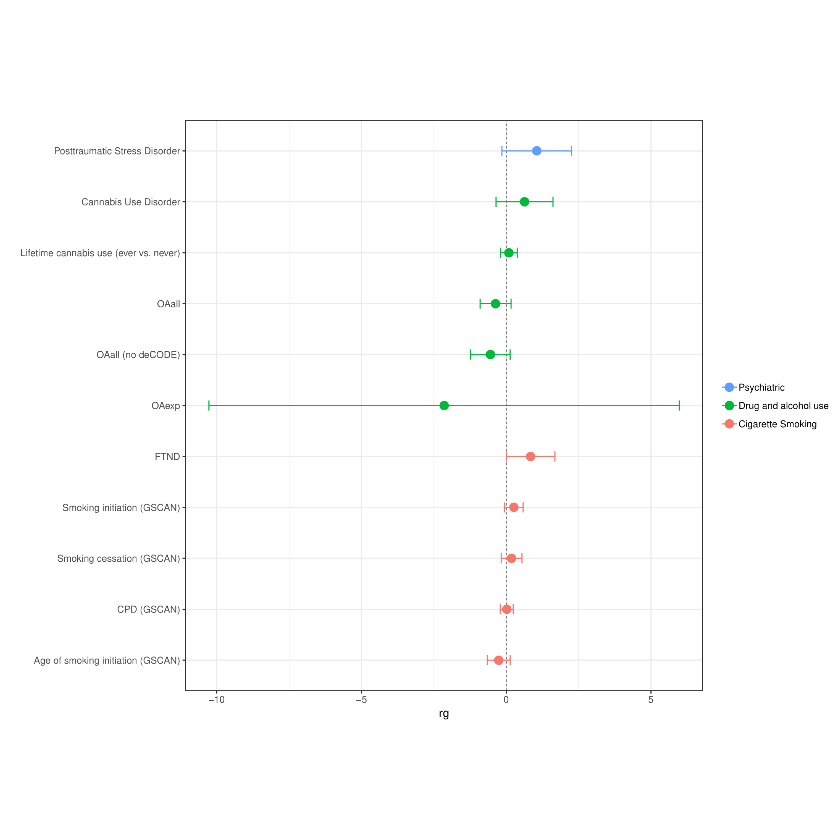

In [11]:
library("png")
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ldsc/ngc_all/fou/001/processing/output/cromwell")

orig <- readPNG("ngc_fou.ld_regression_results-1.png")
zoom <- readPNG("20191213_heroin_ngc_ldsc_fou_rg_results-1.png")

grid::grid.raster(orig)

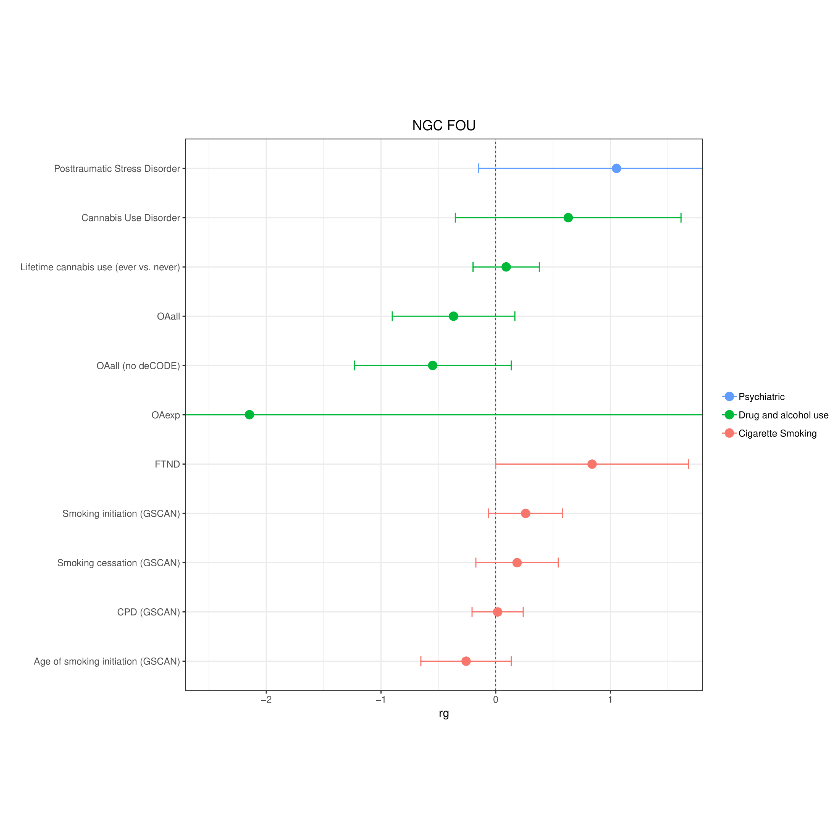

In [12]:
grid::grid.raster(zoom)

## 002 (remove UHS4)
Running without UHS4. n=4321
`s3://rti-midas-data/studies/ngc/meta/092/processing/fou/alive+cats+cogend+start+uhs1-3+vidus+yale-penn.ea.fou.chr1.maf_gt_0.01.rsq_gt_0.3.gz`

<br>

**workflow number:** <br>
~~`a98a9661-efc6-4e38-b59f-8895abf2d2ad`~~ <br>
~~`6f415897-53b5-4bfd-b872-cdc4105c725f`~~ <br>
`da328ccc-58b8-4eef-bbef-6f32ce19930b` <br>

In [ ]:
phenD=20191217_heroin_ldsc_phenotypes_local.xlsx
procD=/shared/jmarks/heroin/ldsc/ngc_all/fou/002

### View Plot

In [13]:
library("png")
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ldsc/ngc_all/fou/002/processing/output/cromwell")

#orig <- readPNG("ngc_fou.ld_regression_results-1.png")
zoom <- readPNG("20191219_heroin_ngc_ldsc_fou_rg_results-1.png")

#grid::grid.raster(orig)

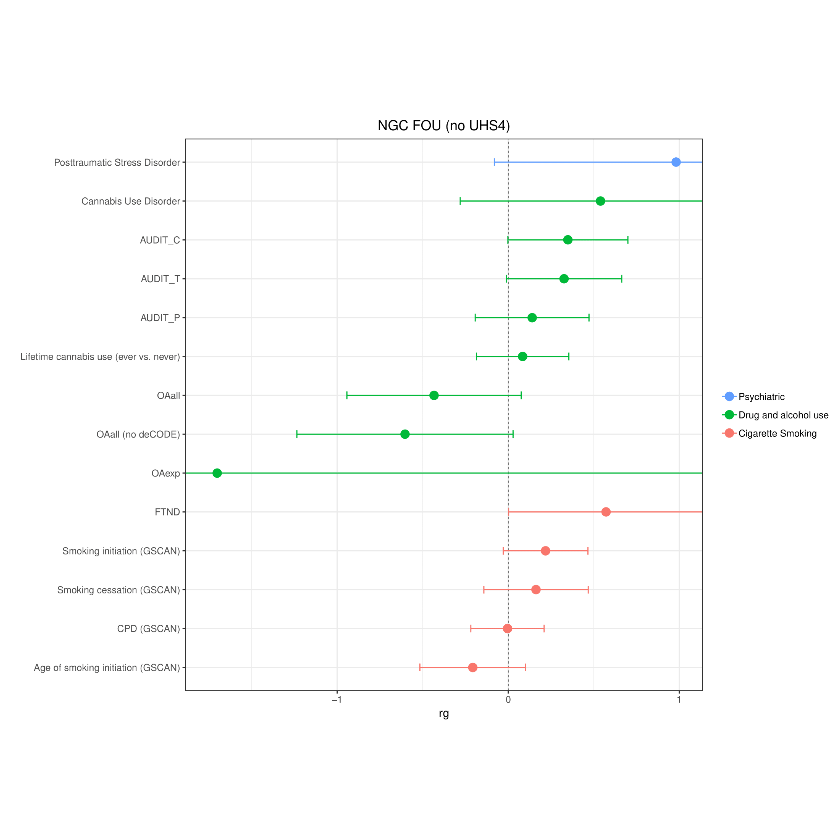

In [15]:
grid::grid.raster(zoom)

# OAexp
~~`621f706e-0985-45b1-a0d7-deebd4e7720b`~~ <br>
`b5167ef6-cc76-4f70-8eef-f7414e441cc8`

In [ ]:
cd /home/jmarks/Projects/heroin/ldsc/ngc_all/oaexp/002

In [ ]:
phenD=20200102_heroin_oaexp_ldsc_phenotypes_local.xlsx
procD=/shared/jmarks/heroin/ldsc/ngc_all/oaexp/002

### View Plot

In [ ]:
library("png")
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ldsc/ngc_all/oaexp/001/processing/output/cromwell")

orig <- readPNG("ngc_oaexp.ld_regression_results-1.png")
zoom <- readPNG("20191216_heroin_ngc_ldsc_oaexp_rg_results-1.png")

grid::grid.raster(orig)

In [ ]:
grid::grid.raster(zoom)

# OAall

`f98f970b-6a93-4773-aaf5-cdbbbf6c68d7`

In [ ]:
cd /home/jmarks/Projects/heroin/ldsc/ngc_all/oaall/001

In [ ]:
phenD=20191210_heroin_oaall_ldsc_phenotypes_local.xlsx
procD=/shared/jmarks/heroin/ldsc/ngc_all/oaall/001

## 002
OAall analysis with a subset of the deCODE data (the subset that contributed to the OAexp analysis). Note that I had to split the run up into 3 portions (a,b, and c) and then combine the results.

~~`8ec8acc8-861c-46bf-97c3-93be9c6af0c6`~~ <br>
~~`d3feda16-4a29-483d-8f96-a0ac036f20f6`~~ <br>

**002_a**
`340f3a99-3a2e-485b-8ce3-d169bf36fd27` <br>

**002_b**
`012440e0-2eab-4727-8091-9edc583b6a6a`

**002_c**
`9eca04fc-59d2-49de-bd8a-a02fd5f10856`

In [ ]:
phenD=20191220_heroin_oaall_ldsc_phenotypes_local.xlsx
procD=/shared/jmarks/heroin/ldsc/ngc_all/oaall/002_b


### View Plot

In [ ]:
library("png")
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ldsc/ngc_all/oaall/002/processing/output/cromwell")

#orig <- readPNG("ngc_oaexp.ld_regression_results-1.png")
zoom <- readPNG("20191220_heroin_ngc_ldsc_oaall_rg_results-1.png")

#grid::grid.raster(orig)
grid::grid.raster(zoom)

## 003
Same as regular OAall 001 except added Alcohol cohorts and FOU_no_uhs4.

`5e2f9618-b990-4b3d-b8d2-7640ddfbc864`

In [ ]:
phenD=20200102_heroin_oaall_ldsc_phenotypes_local.xlsx
procD=/shared/jmarks/heroin/ldsc/ngc_all/oaall/003


### View Plot

In [ ]:
library("png")
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ldsc/ngc_all/oaall/002/processing/output/cromwell")

#orig <- readPNG("ngc_oaexp.ld_regression_results-1.png")
zoom <- readPNG("20191220_heroin_ngc_ldsc_oaall_rg_results-1.png")

#grid::grid.raster(orig)
grid::grid.raster(zoom)

## 004 (add alcohol)
OAall with deCODE OAexp subset and add-in the GSCAN drinks per week and the AUD GWAS (same ones as used in the FTND LDSC comparisons). See [this GitHub Issue 140 comment](https://github.com/RTIInternational/bioinformatics/issues/140#issuecomment-581412227).

~~`c1186904-6724-42e7-be91-9a8862df80fb`~~ <br>
`3fc96edc-3453-45a9-97bc-3b9c5ff75898`

In [ ]:
screen
qrsh

phenD=20200203_heroin_ldsc_phenotypes_local.xlsx
procD=/shared/jmarks/heroin/ldsc/ngc_all/oaall/004
git clone https://github.com/RTIInternational/ld-regression-pipeline/ $procD/ld-regression-pipeline

# OAall (no deCODE)
`1abe35bb-e448-4232-9146-1d9e92ce702a`

In [ ]:
cd /home/jmarks/Projects/heroin/ldsc/ngc_all/oaall_no_decode/001

In [ ]:
phenD=20191210_heroin_oaall_no_decode_ldsc_phenotypes_local.xlsx
procD=/shared/jmarks/heroin/ldsc/ngc_all/oaall_no_decode/001


### View Plot

In [ ]:
library("png")
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ldsc/ngc_all/oaall_no_decode/001/processing/output/cromwell")
#
#orig <- readPNG("ngc_oaexp.ld_regression_results-1.png")
zoom <- readPNG("20191216_heroin_ngc_ldsc_oaall_no_decode_rg_results-1.png")

grid::grid.raster(zoom)

# LD Hub

## Data Selection
* Neurological diseases
* Personality traits
* Cognitive
* Education
* Brain Volume (ENIGMA)
* Psychiatric diseases

## create input files
### OAall

In [ ]:
cd /shared/jmarks/heroin/ldsc/ngc_all/oaall/001/ldhub

outF=ngc_oaall_ldhub_with_pvalues.txt # name of file to create for ldhub
samp_size=304507

### Download outputs for each ref chr from rftm_sumstats step ###
aws s3 sync s3://rti-heroin/ldsc/ngc_20191211/oaall/call-munge_ref/MUNGE_REF_WF.munge_sumstats_wf/ec7b872f-5fd0-431f-a6de-69f43a787aab/call-munge_chr_wf .
        
mv  */MUNGE_CHR.munge_sumstats_chr_wf/*/call-rfmt_sumstats/*.standardized.phase3ID.munge_ready.txt .
rm -rf shard*

## Concat into single file ##
cat *.chr1.*.standardized.phase3ID.munge_ready.txt > $outF
for chr in {2..22}; do
    tail -n +2  *.chr$chr.*.standardized.phase3ID.munge_ready.txt >> $outF
done

## Remove unnecessary columns (need snpID, A1, A2 Beta, Pvalue) in that order ##
head -1 $outF | cut -f1,4,5,6,7 > tmp
tail -n +2 $outF | awk 'BEGIN{OFS="\t"}{print $1, $4, $5, $6, $7}'  >> tmp && mv tmp $outF

## Add sample size column (sample = ) and change header names ##
cat $outF | awk -v var=$samp_size -F "\t"  \
    'BEGIN{OFS="\t";} NR==1{print "snpid", "A1", "A2", "BETA", "N", "P-value"} \
    NR>1{print $1,$2,$3,$4,var, $5}' > tmp && mv tmp $outF

In [ ]:
## local ##
cd /home/jmarks/Projects/heroin/ldsc/ngc_all/oaall/001/processing/input/ldhub
scp -i ~/.ssh/gwas_rsa    ec2-user@34.195.174.206:/shared/jmarks/heroin/ldsc/ngc_all/oaall/001/ldhub/ngc_oaall_ldhub_with_pvalues.txt .
    
# zip file with 7zip
ngc_oaall_ldhub_with_pvalues.txt.zip

### OAall 002 (deCODE subset with OAexp)

In [ ]:
cd /shared/jmarks/heroin/ldsc/ngc_all/oaall/002/ldhub

outF=ngc_oaall002_decode_oaexp_subset_ldhub_with_pvalues.txt # name of file to create for ldhub
samp_size=31620

### Download outputs for each ref chr from rftm_sumstats step ###
aws s3 sync s3://rti-cromwell-output/cromwell-execution/full_ld_regression_wf/9eca04fc-59d2-49de-bd8a-a02fd5f10856/call-munge_ref/MUNGE_REF_WF.munge_sumstats_wf/de1b59a0-505f-494b-ad96-b4b684e5665e/call-munge_chr_wf/ .
        
mv  */MUNGE_CHR.munge_sumstats_chr_wf/*/call-rfmt_sumstats/*.standardized.phase3ID.munge_ready.txt .
rm -rf shard*

## Concat into single file ##
cat *.chr1.*.standardized.phase3ID.munge_ready.txt > $outF
for chr in {2..22}; do
    tail -n +2  *.chr$chr.*.standardized.phase3ID.munge_ready.txt >> $outF
done

## Remove unnecessary columns (need snpID, A1, A2 Beta, Pvalue) in that order ##
head -1 $outF | cut -f1,4,5,6,7 > tmp
tail -n +2 $outF | awk 'BEGIN{OFS="\t"}{print $1, $4, $5, $6, $7}'  >> tmp && mv tmp $outF

## Add sample size column (sample = ) and change header names ##
cat $outF | awk -v var=$samp_size -F "\t"  \
    'BEGIN{OFS="\t";} NR==1{print "snpid", "A1", "A2", "BETA", "N", "P-value"} \
    NR>1{print $1,$2,$3,$4,var, $5}' > tmp && mv tmp $outF

### OAall No deCODE

In [ ]:
cd /shared/jmarks/heroin/ldsc/ngc_all/oaall_no_decode/001/ldhub
outF=oaall_no_decode_with_pvalues.txt # name of file to create for ldhub
samp_size=29039

### Download outputs for each ref chr from rftm_sumstats step ###
aws s3 sync s3://rti-heroin/ldsc/ngc_20191211/oaall_no_decode/call-munge_ref/MUNGE_REF_WF.munge_sumstats_wf/32f0f3ef-8593-4274-9484-0c049e1082ef/call-munge_chr_wf .
        
mv  */MUNGE_CHR.munge_sumstats_chr_wf/*/call-rfmt_sumstats/*.standardized.phase3ID.munge_ready.txt .
rm -rf shard*

## Concat into single file ##
cat *.chr1.*.standardized.phase3ID.munge_ready.txt > $outF
for chr in {2..22}; do
    tail -n +2  *.chr$chr.*.standardized.phase3ID.munge_ready.txt >> $outF
done

## Remove unnecessary columns (need snpID, A1, A2 Beta, Pvalue) in that order ##
head -1 $outF | cut -f1,4,5,6,7 > tmp
tail -n +2 $outF | awk 'BEGIN{OFS="\t"}{print $1, $4, $5, $6, $7}'  >> tmp && mv tmp $outF

## Add sample size column (sample = 18245.00) and change header names ##
cat $outF | awk -v var=$samp_size -F "\t"  \
    'BEGIN{OFS="\t";} NR==1{print "snpid", "A1", "A2", "BETA", "N", "P-value"} \
    NR>1{print $1,$2,$3,$4,var, $5}' > tmp && mv tmp $outF

### OAexp
N=5,561

In [ ]:
cd /shared/jmarks/heroin/ldsc/ngc_all/oaexp/002/ldhub
outF=oaexp_with_pvalues.txt # name of file to create for ldhub
samp_size=5561

### Download outputs for each ref chr from rftm_sumstats step ###
aws s3 sync s3://rti-cromwell-output/cromwell-execution/full_ld_regression_wf/b5167ef6-cc76-4f70-8eef-f7414e441cc8/call-munge_ref/MUNGE_REF_WF.munge_sumstats_wf/b25fcc19-9146-4fd4-b7bf-2ca291b908c9/call-munge_chr_wf/ . 
        
mv  */MUNGE_CHR.munge_sumstats_chr_wf/*/call-rfmt_sumstats/*.standardized.phase3ID.munge_ready.txt .
rm -rf shard*

## Concat into single file ##
cat *.chr1.*.standardized.phase3ID.munge_ready.txt > $outF
for chr in {2..22}; do
    tail -n +2  *.chr$chr.*.standardized.phase3ID.munge_ready.txt >> $outF
done

## Remove unnecessary columns (need snpID, A1, A2 Beta, Pvalue) in that order ##
head -1 $outF | cut -f1,4,5,6,7 > tmp
tail -n +2 $outF | awk 'BEGIN{OFS="\t"}{print $1, $4, $5, $6, $7}'  >> tmp && mv tmp $outF

## Add sample size column (sample = 18245.00) and change header names ##
cat $outF | awk -v var=$samp_size -F "\t"  \
    'BEGIN{OFS="\t";} NR==1{print "snpid", "A1", "A2", "BETA", "N", "P-value"} \
    NR>1{print $1,$2,$3,$4,var, $5}' > tmp && mv tmp $outF

## upload input file
Follow the steps above to zip and upload input file. Essentially, 
* zip the LDHub input file created above (and only this file)
* download the file to your local machine.
* Login to [LDHub](http://ldsc.broadinstitute.org/ldhub/) by clicking on `Get Started with LDHub` and then sign in with your Google email account. (jambqc for me)
* Click `Go Test Center`
* Click `Continue`
* Upload zipped file by clicking `Choose File`, naming your trait, and clicking `Continue`.
* Select traits of interest from LDHub by checking the box next to the trait of interest and then clicking `Submit your request`

**Note**: keep browser open during LDSC analysis on LDHub.

<br>

___

```
Important notes for your uploaded file:

1. To save the uploading time, LD Hub only accepts zipped files as input (e.g. mydata.zip).

2. Please check that there is ONLY ONE plain TXT file (e.g. mydata.txt) in your zipped file.

3. Please make sure you do NOT zip any folder together with the plain txt file (e.g. /myfolder/mydata.txt), otherwise you will get an error: [Errno 2] No such file or directory

4. Please do NOT zip multiple files (e.g. zip mydata.zip file1.txt file2.txt ..) or zip a file with in a folder (e.g. zip mydata.zip /path/to/my/file/mydata.txt).

5. Please keep the file name of your plain txt file short (less than 50 characters), otherwise you may get an error: [Errno 2] No such file or directory

6. Please zip your plain txt file using following command (ONE file at a time):

For Windows system: 1) Locate the file that you want to compress. 2) Right-click the file, point to Send to, and then click Compressed (zipped) folder.

For Linux and Mac OS system: zip mydata.zip mydata.txt

Reminder: for Mac OS system, please do NOT zip you file by right click mouse and click "Compress" to zip your file, this will automatically create a folder called "__MACOS". You will get an error: [Errno 2] No such file or directory.

Upload the trait of interest
To save your upload time, we highly recommend you to use the SNP list we used in LD Hub to reduce the number of SNPs in your uploaded file. Click here to download our SNP list (w_hm3.noMHC.snplist.zip).

Please upload the zipped file you just created. Click here to download an input example.
```

# Create Final Plot
Merge the output tables from cromwell and LDHub. The merged table should have the header:
```
trait2	Trait_Label	Trait_Group	rg	se	z	p	h2_obs	h2_obs_se	h2_int	h2_int_se	gcov_int	gcov_int_se
```

**Note**: upload the plot table to EC2 instance to run docker and create the plot.

In [ ]:
## enter interactive mode ##
# note that the image tag corresponds to the latest tag for this image
phen=oaall

docker run -it -v"/shared/jmarks/heroin/ldsc/ngc_all/$phen/004/plot:/data/" \
    rticode/plot_ld_regression_results:b018e08753390ee773ed7e9eb2ca851c88eee749  /bin/bash


Rscript /opt/plot_ld_regression/plot_ld_regression_results.R  \
    --input_file 20200203_heroin_ngc_ldsc_oaall_decode_oaexp_subset_rg_results.csv \
    --output_file 20200203_heroin_ngc_ldsc_oaall_decode_oaexp_subset_rg_results.pdf  \
    --comma_delimited \
    --xmax 1.1 \
    --xmin -.6 \
    --title "NGC OAall (deCODE subset of OAexp)"

#Rscript /opt/plot_ld_regression/plot_ld_regression_results.R  \
#    --input_file 20191213_heroin_ngc_ldsc_${phen}_rg_results.csv \
#    --output_file 20191213_heroin_ngc_ldsc_${phen}_rg_results.pdf  \
#    --comma_delimited \
#    --xmax 1.6 \
#    --xmin -2.5 \
#    --title "NGC FOU"
#

#Rscript /opt/plot_ld_regression/plot_ld_regression_results.R  \
#    --input_file 20191216_heroin_ngc_ldsc_${phen}_rg_results.csv \
#    --output_file 20191216_heroin_ngc_ldsc_${phen}_rg_results.pdf  \
#    --comma_delimited \
#    --xmax 1.3 \
#    --xmin -.6 \
#    --title "NGC OAall"
    
#Rscript /opt/plot_ld_regression/plot_ld_regression_results.R  \
#    --input_file 20191216_heroin_ngc_ldsc_${phen}_rg_results.csv \
#    --output_file 20191216_heroin_ngc_ldsc_${phen}_rg_results.pdf  \
#    --comma_delimited \
#    --xmax 1.6 \
#    --xmin -.6 \
#    --title "NGC OAall (no deCODE)"